In [1]:
from hdf5storage import loadmat, savemat 
import numpy as np 
import networkx as nx
from matplotlib import pyplot as plt 

In [3]:
demographics=loadmat('demographics.mat')

In [4]:
demographics.keys()

dict_keys(['__header__', '__version__', '__globals__', 'FM_scores', 'ages', 'cor_ind', 'days_poststroke', 'lesion_sizes', 'matfile_names', 'subc_ind'])

In [358]:
matfile_names=demographics['matfile_names']
FM_scores=np.squeeze(demographics['FM_scores'])
ages=demographics['ages']
days_poststroke=demographics['days_poststroke']
lesion_sizes=demographics['lesion_sizes']
cor_ind=demographics['cor_ind']
subc_ind=demographics['subc_ind']


In [6]:
import os
import numpy as np
import time


In [8]:
# Set the directory path
directory_path = '/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh'

In [9]:
os.chdir(directory_path)

In [155]:
pwd

'/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh'

In [13]:
file_name

'0.mat'

In [15]:
tic = time.time()
# Load data from the .mat file
file_name = str(matfile_names[0][0]) + '.mat'
data = loadmat(file_name)
# Extract data from the loaded file
stroke_coh = data['stroke_coh']
stroke_Pcoh = data['stroke_Pcoh']
penalizationIn_op=data['penalizationIn_op']
penalizationOut_op=data['penalizationOut_op']
minDev_op=data['minDev_op']
subject_ID = data['subject_ID']
chanlocs = data['chanlocs']
ch_labels = data['ch_labels']
ch_dubious = data['ch_dubious']
ch_peripheral = data['ch_peripheral']
Fs = data['Fs']
toc = time.time()
print(f"Time elapsed for file {file_name}: {toc - tic:.4f} seconds")

Time elapsed for file 0.mat: 0.0732 seconds


In [ ]:
np.shape(stroke_Pcoh[0][4])

In [18]:
G= nx.from_numpy_array(stroke_Pcoh[0][4])

In [20]:
edges=nx.edges(G)
nodes=nx.nodes(G)

In [23]:
dg_hist=nx.degree_histogram(G)

In [37]:
data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+file_name, variable_names='stroke_Pcoh')

In [39]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'stroke_Pcoh'])

In [46]:
file_name

'0.mat'

In [ ]:
# didn't work
dg_hist_5 = [[] for _ in range(5)]
dg_hist_61 = [dg_hist_5 for _ in range(61)]
for f in range(61):
    data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+str(matfile_names[f][0]) + '.mat', variable_names='stroke_Pcoh')
    for freq in range(5):
        G= nx.from_numpy_array(data['stroke_Pcoh'][0][freq])
        dg_hist=nx.degree_histogram(G)
        dg_hist_61[f][freq]=dg_hist.copy()

# Failed: some how every all 61 data set in each freq look the same

# 28 s

In [98]:
len(dg_hist_61[5])

5

In [140]:
dg_hist_61[22][4]

[0,
 0,
 175,
 15,
 15,
 6,
 4,
 8,
 4,
 5,
 8,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 0,
 1,
 3,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 5,
 3,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 0,
 0,
 3,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 4,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [325]:
# This works
dg_hist_61 = np.empty((61, 5), dtype=object)
for f in range(61):
    file_name = str(matfile_names[f][0]) + '.mat'
    data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+file_name, variable_names='stroke_Pcoh')
    stroke_Pcoh = data['stroke_Pcoh']
    for freq in range(5):
        G= nx.from_numpy_array(stroke_Pcoh[0][freq])
        dg_hist=nx.degree_histogram(G)
        dg_hist_61[f,freq]=dg_hist.copy()

In [319]:
f=11
file_name = str(matfile_names[f][0]) + '.mat'
data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+file_name, variable_names='stroke_Pcoh')
stroke_Pcoh = data['stroke_Pcoh']
freq=4
G= nx.from_numpy_array(stroke_Pcoh[0][freq])
dg_hist=nx.degree_histogram(G)
dg_hist

[0,
 0,
 188,
 27,
 3,
 3,
 7,
 1,
 1,
 4,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 5,
 1,
 3,
 4,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 3,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 3,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 3,
 4,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 4,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [320]:
stroke_Pcoh[0][4]

array([[1.  , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.5 , 0.5 , 0.25],
       [1.  , 1.  , 1.  , ..., 0.5 , 0.5 , 0.5 ],
       ...,
       [0.  , 0.5 , 0.5 , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.5 , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.5 , ..., 0.  , 0.  , 1.  ]])

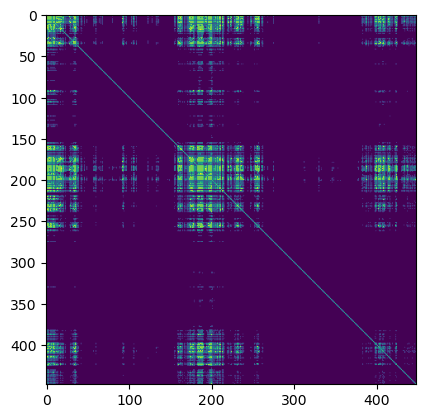

In [321]:
plt.imshow(stroke_Pcoh[0][freq])

In [322]:
len(nx.edges(G))

12018

In [324]:
np.shape(stroke_Pcoh[0][freq])

(448, 448)

In [146]:
type(dg_hist_61[59,1])

list

In [ ]:
dg_hist_61[59,1]

In [159]:
os.chdir('/home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/organize_62stroke')

In [162]:
import pickle

In [326]:
# Save dg_hist_61 as a pickle file
with open('dg_hist_61.pkl', 'wb') as file:
    pickle.dump(dg_hist_61, file)

In [164]:
# Load the saved data back into a variable
with open('dg_hist_61.pkl', 'rb') as file:
    loaded_dg_hist_61 = pickle.load(file)

In [327]:
loaded_dg_hist_61[60,4]

[0,
 0,
 175,
 15,
 15,
 6,
 4,
 8,
 4,
 5,
 8,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 0,
 1,
 3,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 5,
 3,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 0,
 0,
 3,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 4,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [181]:
np.shape(np.array(dg_hist_61[60,4]))

(247,)

In [184]:
np.argmax(dg_hist_61[60,4], axis=0)

2

In [183]:
np.argmax(np.array(dg_hist_61[60,4]), axis=0)

2

In [192]:
ans=dg_hist_61[33,0]

In [168]:
np.sum(dg_hist_61[60,4])

448

In [333]:
# identify the highest dreegree frequency 
max_dg_freq=np.zeros((61,5))
for f in range(61):
    for freq in range(5):
        max_dg_freq[f,freq]=max(dg_hist_61[f,freq])*np.argmax(dg_hist_61[f,freq], axis=0)
        # max_dg_freq[f,freq]=np.argmax(dg_hist_61[f,freq], axis=0)


In [329]:
max_dg_freq[11,4]

2.0

In [334]:
max_dg_freq

array([[172., 220., 240., 272., 274.],
       [112., 154., 120., 138., 158.],
       [410., 580., 594., 414., 408.],
       [630., 352., 362., 344., 398.],
       [140., 144., 144., 144., 144.],
       [500., 332., 314., 316., 348.],
       [232., 286., 308., 314., 352.],
       [258., 278., 272., 290., 354.],
       [348., 364., 356., 382., 382.],
       [290., 268., 270., 270., 316.],
       [248., 236., 240., 228., 230.],
       [764., 380., 378., 378., 376.],
       [276., 284., 266., 212., 202.],
       [384., 378., 376., 378., 380.],
       [334., 322., 336., 350., 364.],
       [286., 274., 242., 228., 240.],
       [214., 302., 276., 306., 362.],
       [194., 188., 194., 196., 206.],
       [633., 450., 550., 514., 518.],
       [286., 286., 314., 298., 324.],
       [286., 274., 280., 278., 264.],
       [440., 434., 412., 424., 420.],
       [284., 260., 254., 268., 390.],
       [218., 210., 228., 220., 276.],
       [364., 336., 358., 364., 412.],
       [322., 262., 286.,

In [341]:
days_poststroke=np.squeeze(days_poststroke)

(100.0, 2000.0)

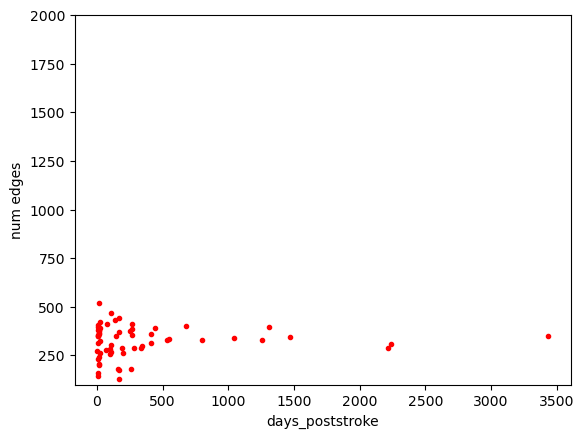

In [350]:
plt.plot(days_poststroke,max_dg_freq[:,4],'r.')
plt.xlabel('days_poststroke')
plt.ylabel('num edges')
plt.ylim([100,2000])

(0.0, 500.0)

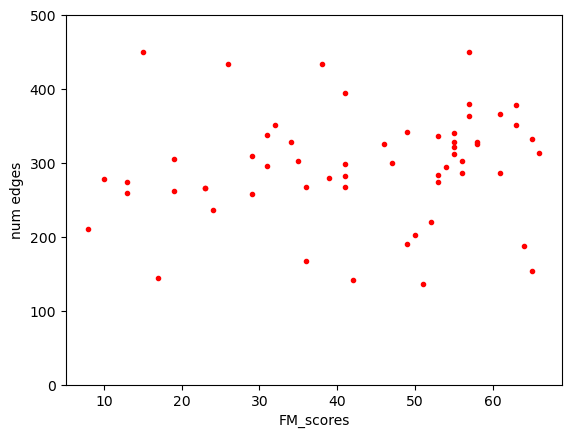

In [367]:

plt.plot(FM_scores,max_dg_freq[:,1],'r.')
plt.xlabel('FM_scores')
plt.ylabel('num edges')
plt.ylim([0,500])

(0.0, 500.0)

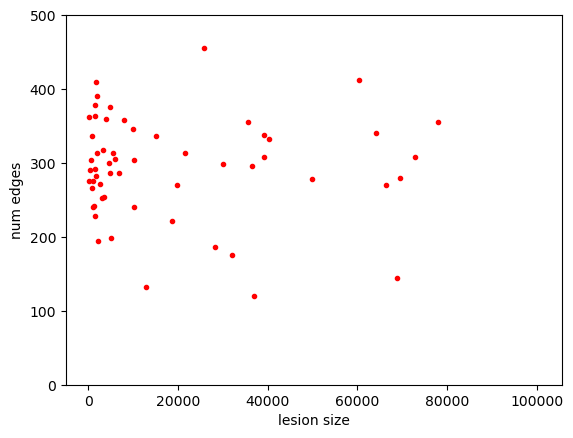

In [351]:
plt.plot(lesion_sizes,max_dg_freq[:,2],'r.')
plt.xlabel('lesion size')
plt.ylabel('num edges')
plt.ylim([0,500])

In [ ]:
plt.subplot(1,2,1)
plt.plot()

In [245]:
cor_test=cor_ind.tolist()

In [273]:
bool_cor=np.squeeze(cor_ind ==1)
bool_subc=np.squeeze(subc_ind==1)

In [280]:
sum(cor_ind)

array([27], dtype=uint8)

In [355]:
cor_ed=np.zeros((int(sum(cor_ind)),5))
subc_ed=np.zeros((int(sum(subc_ind)),5))
for freq in range(5):
    cor_ed[:,freq]=max_dg_freq[:,freq][bool_cor]
    subc_ed[:,freq]=max_dg_freq[:,freq][bool_subc]


In [295]:
freq=0
AA=np.concatenate((cor_ed[:,freq],subc_ed[:,freq]),axis=0)

In [296]:
np.shape(AA)

(61,)

In [275]:
A[bool_cor]

array([1.58000e+02, 1.44000e+02, 3.52000e+02, 3.82000e+02, 2.30000e+02,
       4.20000e+02, 3.90000e+02, 2.82000e+02, 4.30000e+02, 2.01152e+05,
       3.68000e+02, 4.40000e+02, 2.90000e+02, 3.84000e+02, 4.14000e+02,
       2.86000e+02, 2.96000e+02, 3.58000e+02, 3.14000e+02, 3.90000e+02,
       3.30000e+02, 3.34000e+02, 4.02000e+02, 3.42000e+02, 3.46000e+02,
       3.10000e+02, 3.50000e+02])

(0.0, 1000.0)

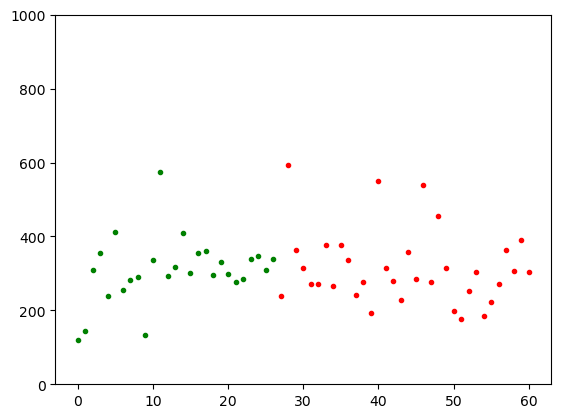

In [357]:
# cortical vs subc
freq=2
plt.plot(range(27),cor_ed[:,freq],'g.')
plt.plot(range(27,61),subc_ed[:,freq],"r.")
plt.ylim([0,1000])

